### 範例一：分類

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier

C:\Users\karta\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
iris = datasets.load_iris()#載入sklearn資料
iris_X = iris.data
iris_y = iris.target #label

In [4]:
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [ ]:
print(iris_y)

In [5]:
#print(iris)
#iris.DESCR
print(iris_X[:5, :])
print(iris_y)

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
#  訓練集X,測試集X,訓練集y,測試集y = train_test_split( X, y, %, random_state=  )

X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.3, random_state=88)
print(y_train)

[2 1 0 2 0 2 1 1 0 0 2 1 2 2 1 0 1 2 1 1 1 1 0 0 1 0 1 0 2 0 2 0 0 2 1 0 1
 2 2 1 0 1 1 0 1 1 0 1 1 1 2 2 2 0 0 1 2 2 1 1 0 0 1 2 0 0 1 0 2 0 2 1 0 0
 2 0 2 0 2 0 2 2 1 0 2 0 1 1 1 0 1 0 1 1 1 2 1 0 2 2 1 1 2 2 0]


In [7]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)  #.fit ==> 訓練  .predict==>預測
#fit之後的knn就以已經訓練好的

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [8]:
print(knn.predict(X_test))
y_predict = knn.predict(X_test)

[1 2 0 0 1 0 1 2 2 1 0 1 1 2 2 1 0 0 2 0 0 1 2 1 2 2 0 2 1 2 0 0 0 1 1 2 0
 2 0 1 2 2 1 0 1]


In [9]:
print(y_test)

[1 2 0 0 1 0 1 2 2 1 0 1 1 2 2 1 0 0 2 0 0 2 2 1 2 2 0 2 1 2 0 0 0 2 1 2 0
 2 0 2 2 2 2 0 1]


In [10]:
print('Misclassified samples: %d' % (y_test != y_predict).sum())

Misclassified samples: 4


In [11]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_predict))


Accuracy: 0.91


In [ ]:
#儲存模型

In [15]:
import pickle #pickle

#存 Model(資料夾要先建立)
with open('save/clf.pickle', 'wb') as f:
    pickle.dump(knn, f)

In [16]:
#讀 Model
with open('save/clf.pickle', 'rb') as f:
    knn2 = pickle.load(f)
    #測試讀取之後的Model    
print(knn2.predict(X_test))

[1 2 0 0 1 0 1 2 2 1 0 1 1 2 2 1 0 0 2 0 0 1 2 1 2 2 0 2 1 2 0 0 0 1 1 2 0
 2 0 1 2 2 1 0 1]


In [18]:
import matplotlib.pyplot as plt

plt.scatter(y_predict,y_test, alpha=0.04)
plt.show()

In [19]:
#標準化


from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#print(X_test_std)



In [20]:
print(X_test_std)

[[-0.53947728 -0.08631629  0.44678312  0.41644435]
 [ 1.28778448  0.40358699  1.14263816  1.47970653]
 [-0.90492963  0.89349027 -1.29285448 -1.31135669]
 [-1.27038198  0.15863535 -1.23486656 -1.31135669]
 [ 1.28778448  0.15863535  0.6787348   0.41644435]
 [-0.53947728  0.89349027 -1.17687864 -1.31135669]
 [-1.14856453 -1.55602613 -0.24907192 -0.24809451]
 [ 2.26232408  1.87329683  1.72251736  1.34679876]
 [ 0.31324487 -1.06612285  1.08465024  0.28353658]
 [-0.17402493 -0.08631629  0.27281936  0.01772104]
 [-0.17402493  3.34300667 -1.29285448 -1.04554114]
 [-0.17402493 -0.57621957  0.44678312  0.15062881]
 [-1.02674708 -2.5358327  -0.13309608 -0.24809451]
 [ 0.80051467 -0.08631629  1.02666232  0.81516767]
 [-0.29584238 -0.57621957  0.6787348   1.08098321]
 [ 0.31324487 -0.57621957  0.56275896  0.01772104]
 [-1.27038198  0.89349027 -1.0609028  -1.31135669]
 [-0.05220748  2.36320011 -1.46681824 -1.31135669]
 [ 0.55687977  0.64853863  1.31660192  1.74552207]
 [-0.90492963  1.13844191 -1.35

In [21]:
knn1 = KNeighborsClassifier()
knn1.fit(X_train_std, y_train)

y_predict = knn1.predict(X_test_std)

from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_predict))

Accuracy: 0.91


### 範例二：回歸

In [22]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [23]:
loaded_data = datasets.load_boston()
data_X = loaded_data.data
data_y = loaded_data.target

In [24]:
loaded_data

{'DESCR': "Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per

In [25]:
model = LinearRegression(normalize=False)
model.fit(data_X, data_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
predicted = model.predict(data_X)



In [28]:
print(model.predict(data_X[:4, :]))
print(data_y[:4])

[ 30.00821269  25.0298606   30.5702317   28.60814055]
[ 24.   21.6  34.7  33.4]


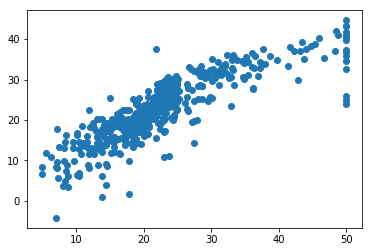

In [29]:
plt.scatter(data_y,predicted)
plt.show()